<h1><p>AISC1001 Group Assignment 


<h5>

Application exercise: Linear/Logistic Regression

1. Ajay prudhvi Kalidasu - 500187692

2. Harpreet kaur Dounshi  -  500187865

3. Sai sourabh Cherukupally - 500194560

4. Vimala Ponnambalam  - 500188738

5. Yashaswini Tangirala  - 500192762


<h5> AIM: Find 1 dataset to run linear/or logistic regression on and discuss the properties of the datasets, your results and inferences.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error



import pandas as pd
import numpy as np

In [8]:
boston_housing = load_boston()
type(boston_housing)

sklearn.utils.Bunch

In [9]:
print(boston_housing.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
df_boston=pd.DataFrame(boston_housing.data)
df_boston.columns=boston_housing.feature_names
df_boston.rename(columns = {'CRIM' : 'Crime_Rate', 'ZN' : 'Residential_Zone', 'INDUS':'Business_Area',\
    'CHAS':'Bound','NOX':'Nitric_Oxide','RM':'Avg_Rooms','AGE':'Old_Units','DIS':'Emp_Center','RAD':'Highway',\
        'TAX':'Tax','PTRATIO':'Stu_Teach','B':'Black_Prop','LSTAT':'Low_Sts'}, inplace = True)
df_boston['Target'] = boston_housing['target']

df_boston.head()

,Crime_Rate,Residential_Zone,Business_Area,Bound,Nitric_Oxide,Avg_Rooms,Old_Units,Emp_Center,Highway,Tax,Stu_Teach,Black_Prop,Low_Sts,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<h1>EDA: Univarient Analysis

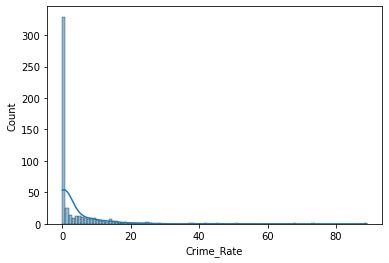

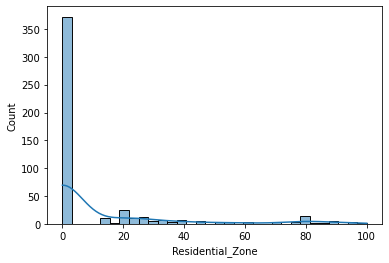

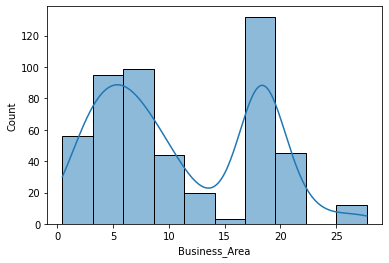

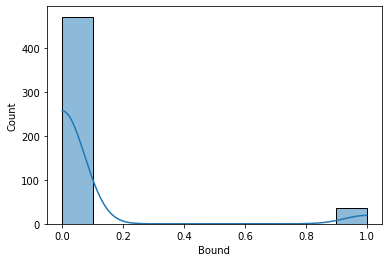

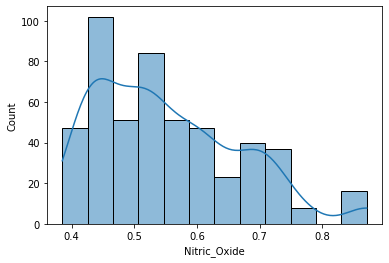

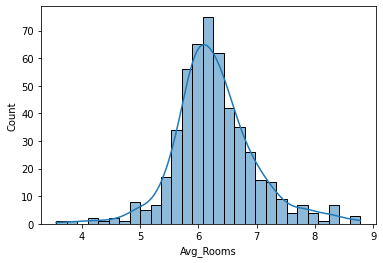

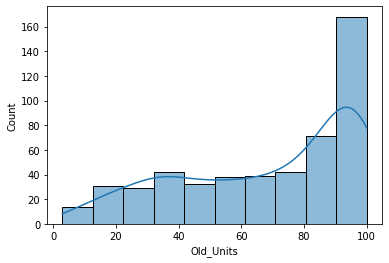

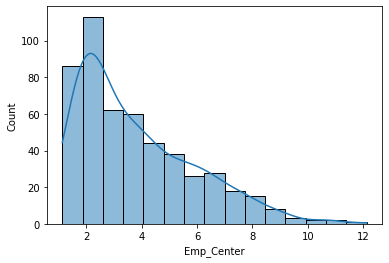

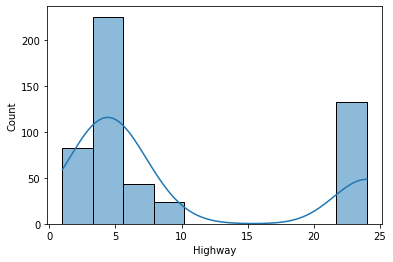

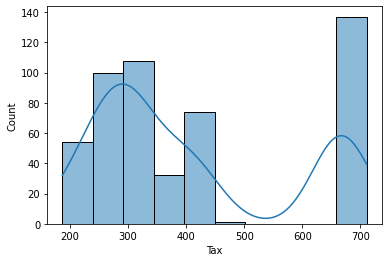

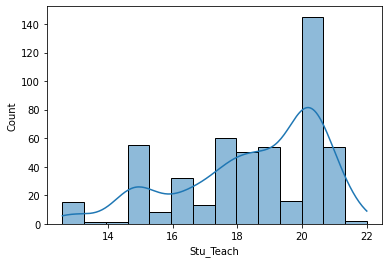

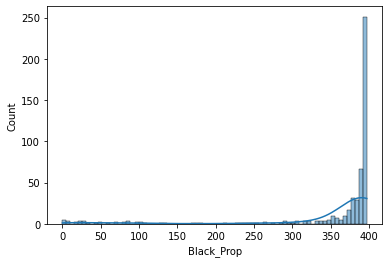

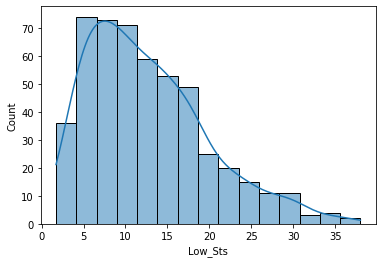

<Figure size 432x288 with 0 Axes>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in df_boston.columns[:-1]:
    #print(col)
    #plt.xlabel(col)
    sns.histplot(df_boston[col],kde=True)
    
    plt.figure()

<h3><b> From the univariant analysis we can observe that the continuous variable columns are not normally distributed </h3>

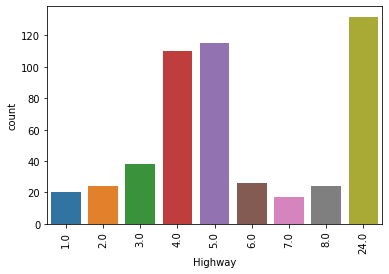

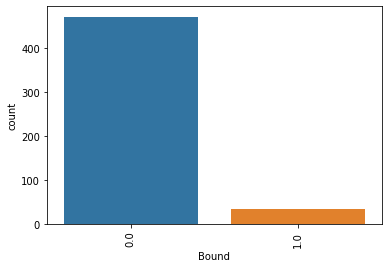

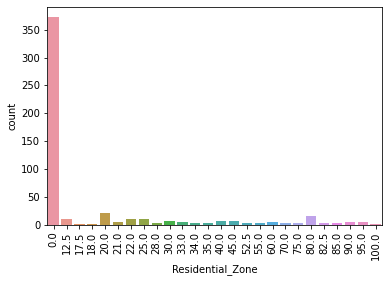

In [12]:
col=['Highway','Bound','Residential_Zone']
for items in col:
    sns.countplot(data=df_boston,x=items)
    plt.xticks(rotation=90)
    plt.show()

In [13]:
abs(df_boston.corr()['Target'][:]).sort_values(ascending=False)

Target              1.000000
Low_Sts             0.737663
Avg_Rooms           0.695360
Stu_Teach           0.507787
Business_Area       0.483725
Tax                 0.468536
Nitric_Oxide        0.427321
Crime_Rate          0.388305
Highway             0.381626
Old_Units           0.376955
Residential_Zone    0.360445
Black_Prop          0.333461
Emp_Center          0.249929
Bound               0.175260
Name: Target, dtype: float64

<h1> EDA: Bivariant Analysis

<h4> From the barplots we can observe below<br>
1.  house price is more when bound is 0<br>
2.  when the residential zone is 95 then the rate of the house price is higher<br>
3.  With a highway of 8, the price of the house is most

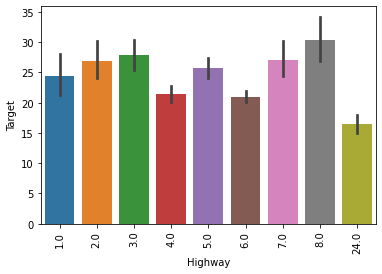

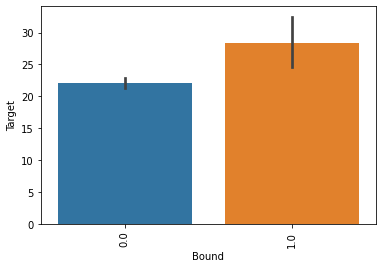

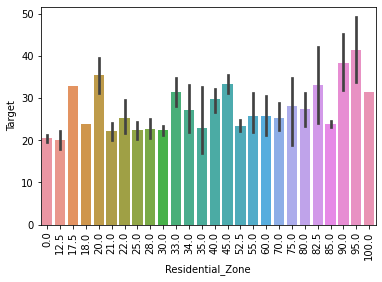

In [14]:
col=['Highway','Bound','Residential_Zone']
for items in col:
    sns.barplot(data=df_boston,x=items,y='Target')
    plt.xticks(rotation=90)
    plt.show()

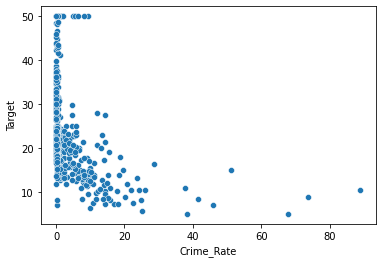

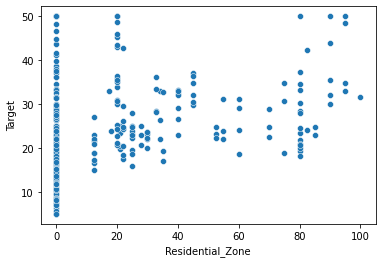

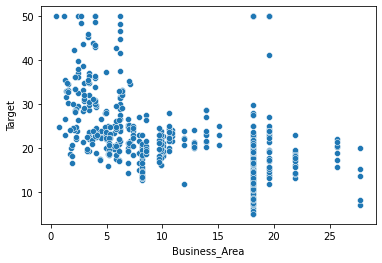

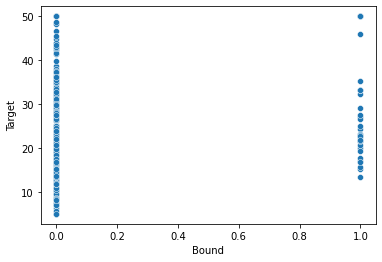

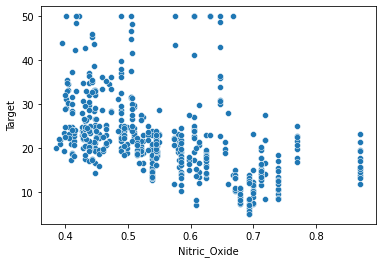

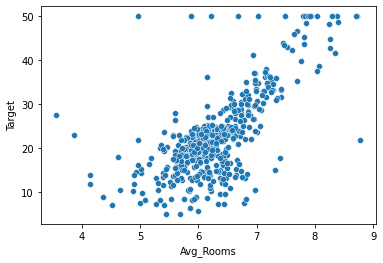

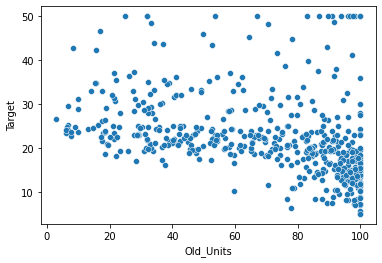

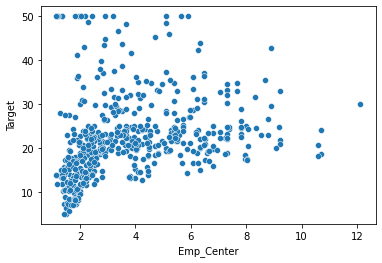

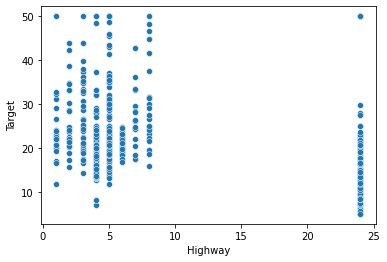

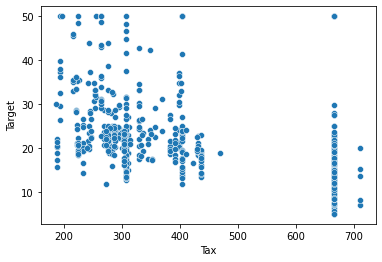

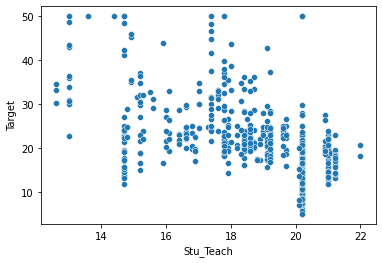

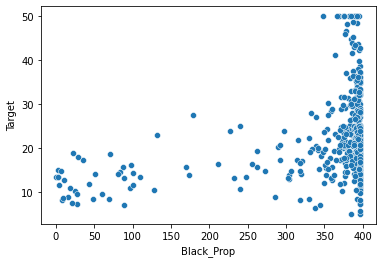

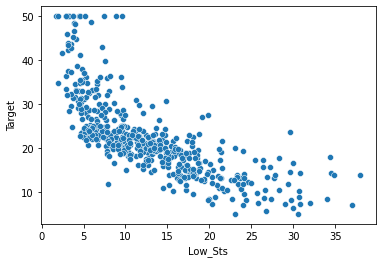

<Figure size 432x288 with 0 Axes>

In [15]:
for col in df_boston.columns[:-1]:
    #print(col)
    #plt.xlabel(col)
    sns.scatterplot(data=df_boston,x=col,y='Target')

    #sns.scatterplot()
    
    plt.figure()

<h4> from above graphs we can infer below relationship of each continuous columns with Traget variable
Positive: <br>
high: Avg rooms<br>
low: residential zone<br> 
No-relation: Black_prop, Emp_center<br>

Negative:<br>
high: Nitric_Oxide,Tax,Business_Area,Stu_Teach,Low_Sts<br> 
low: Old_Units,Highway,Crime_Rate<br>


In [16]:
for col in df_boston.columns[:-1]:
    print(col,':')
    print(abs(df_boston.corr()[col][:]).sort_values(ascending=False),end='\n\n')

Crime_Rate :
Crime_Rate          1.000000
Highway             0.625505
Tax                 0.582764
Low_Sts             0.455621
Nitric_Oxide        0.420972
Business_Area       0.406583
Target              0.388305
Black_Prop          0.385064
Emp_Center          0.379670
Old_Units           0.352734
Stu_Teach           0.289946
Avg_Rooms           0.219247
Residential_Zone    0.200469
Bound               0.055892
Name: Crime_Rate, dtype: float64

Residential_Zone :
Residential_Zone    1.000000
Emp_Center          0.664408
Old_Units           0.569537
Business_Area       0.533828
Nitric_Oxide        0.516604
Low_Sts             0.412995
Stu_Teach           0.391679
Target              0.360445
Tax                 0.314563
Avg_Rooms           0.311991
Highway             0.311948
Crime_Rate          0.200469
Black_Prop          0.175520
Bound               0.042697
Name: Residential_Zone, dtype: float64

Business_Area :
Business_Area       1.000000
Nitric_Oxide        0.763651
Tax     

In [17]:
def linear_model(df):
    regr_model=LinearRegression()
    #x_train,x_test,y_train,y_test=np.array()
    x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=0.2,random_state=6)
    print('features',df.columns[:-1],'\n')
    print("Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train\t: ",df.shape,x_train.shape, x_test.shape,y_train.shape,y_test.shape)

    regr_model.fit(x_train, y_train)
    y_predict = regr_model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_predict))
    r2= r2_score(y_test, y_predict)
    #mean_absolute_error(y_test, y_predict)
    
    print('mae:',mean_absolute_error(y_test, y_predict))
    print('rmse & r2',rmse,r2)
    print('Slope\t:' ,regr_model.coef_)
    print('Intercept\t:', regr_model.intercept_)
    print("Test Score\t:",regr_model.score(x_test,y_test))
    print("Train Score\t:",regr_model.score(x_train,y_train))

In [18]:
linear_model(df_boston)

features Index(['Crime_Rate', 'Residential_Zone', 'Business_Area', 'Bound',
       'Nitric_Oxide', 'Avg_Rooms', 'Old_Units', 'Emp_Center', 'Highway',
       'Tax', 'Stu_Teach', 'Black_Prop', 'Low_Sts'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (506, 14) (404, 13) (102, 13) (404, 1) (102, 1)
mae: 3.811219584009737
rmse & r2 5.217598463306335 0.683902689006904
Slope	: [[-8.37706234e-02  5.26973316e-02 -2.99091142e-02  2.80173966e+00
  -1.53320954e+01  3.36056709e+00  6.03391959e-03 -1.57441516e+00
   3.48136303e-01 -1.48030305e-02 -9.87156291e-01  9.21978712e-03
  -5.70626081e-01]]
Intercept	: [40.2229734]
Test Score	: 0.683902689006904
Train Score	: 0.7515229944409221


In [19]:
df1=df_boston[['Avg_Rooms','Stu_Teach','Business_Area','Tax','Nitric_Oxide','Target']]
linear_model(df1)

features Index(['Avg_Rooms', 'Stu_Teach', 'Business_Area', 'Tax', 'Nitric_Oxide'], dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (506, 6) (404, 5) (102, 5) (404, 1) (102, 1)
mae: 3.919281982371289
rmse & r2 5.7074554884789475 0.6217625206778383
Slope	: [[ 6.87332521e+00 -1.03499376e+00 -9.29710019e-03 -5.92955721e-03
  -1.06099610e+01]]
Intercept	: [6.90241463]
Test Score	: 0.6217625206778383
Train Score	: 0.6009480687525576


In [20]:
df2=df_boston[['Avg_Rooms','Stu_Teach','Business_Area','Target']]
linear_model(df2)

features Index(['Avg_Rooms', 'Stu_Teach', 'Business_Area'], dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (506, 4) (404, 3) (102, 3) (404, 1) (102, 1)
mae: 4.259905047965236
rmse & r2 5.972657674715365 0.5857955679057039
Slope	: [[ 6.82934592 -1.07622385 -0.24396106]]
Intercept	: [2.24526633]
Test Score	: 0.5857955679057039
Train Score	: 0.5844660245411164


<h3> Normalising the data

In [21]:
from sklearn.preprocessing import RobustScaler
def scaling(df):
    trans= RobustScaler()
    data=trans.fit_transform(df)
    df_stand= pd.DataFrame(data,columns=df.columns)
    #print(df_stand.head())
    return(df_stand)
    

In [22]:
df_stand=scaling(df_boston)

In [23]:
df_stand.head()

,Crime_Rate,Residential_Zone,Business_Area,Bound,Nitric_Oxide,Avg_Rooms,Old_Units,Emp_Center,Highway,Tax,Stu_Teach,Black_Prop,Low_Sts,Target
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579,1.529781
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699,1.880878


In [24]:
linear_model(df_stand)

features Index(['Crime_Rate', 'Residential_Zone', 'Business_Area', 'Bound',
       'Nitric_Oxide', 'Avg_Rooms', 'Old_Units', 'Emp_Center', 'Highway',
       'Tax', 'Stu_Teach', 'Black_Prop', 'Low_Sts'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (506, 14) (404, 13) (102, 13) (404, 1) (102, 1)
mae: 0.4778958726031036
rmse & r2 0.6542443214177232 0.6839026890069031
Slope	: [[-0.03776283  0.0825977  -0.04841714  0.35131532 -0.33644096  0.31098414
   0.03711144 -0.6096787   0.8730691  -0.71834142 -0.34658779  0.02410151
  -0.71587636]]
Intercept	: [0.24098881]
Test Score	: 0.6839026890069031
Train Score	: 0.7515229944409221


<h3> <b>The score imporved to 68%, checking if there are any improvement after removing outliers

In [25]:
for col in df_boston:    
    q_low = df_boston[col].quantile(0.05)
    q_hi  = df_boston[col].quantile(0.90)

    df_filtered = df_boston[(df_boston[col] < q_hi) & (df_boston[col] > q_low)]

In [26]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        428 non-null    float64
 1   Residential_Zone  428 non-null    float64
 2   Business_Area     428 non-null    float64
 3   Bound             428 non-null    float64
 4   Nitric_Oxide      428 non-null    float64
 5   Avg_Rooms         428 non-null    float64
 6   Old_Units         428 non-null    float64
 7   Emp_Center        428 non-null    float64
 8   Highway           428 non-null    float64
 9   Tax               428 non-null    float64
 10  Stu_Teach         428 non-null    float64
 11  Black_Prop        428 non-null    float64
 12  Low_Sts           428 non-null    float64
 13  Target            428 non-null    float64
dtypes: float64(14)
memory usage: 50.2 KB


In [27]:
df_stand_fil=scaling(df_filtered)

In [28]:
linear_model(df_stand_fil)

features Index(['Crime_Rate', 'Residential_Zone', 'Business_Area', 'Bound',
       'Nitric_Oxide', 'Avg_Rooms', 'Old_Units', 'Emp_Center', 'Highway',
       'Tax', 'Stu_Teach', 'Black_Prop', 'Low_Sts'],
      dtype='object') 

Shape of DataFrame, X-Test,X-Train,Y-Test,Y-Train	:  (428, 14) (342, 13) (86, 13) (342, 1) (86, 1)
mae: 0.33791166221482377
rmse & r2 0.4218549476201532 0.7046507575427605
Slope	: [[-0.05051696  0.01523428 -0.03828017  0.1960214  -0.3609646   0.13564562
  -0.18771559 -0.49751666  0.14128166 -0.2148944  -0.28335706  0.02216385
  -0.45911007]]
Intercept	: [0.11080563]
Test Score	: 0.7046507575427605
Train Score	: 0.7163390721223248


<h1>The Model is 70% efficient in Linear Regression Model, the score improved

RMSE: .42

checking if there is any imporvement if Gradient Descent is applied

In [29]:
from sklearn.linear_model import SGDRegressor
#df6=df[['BMI','Log_Serum_Triglyserides','BP','Tot_Cholesterol','High_Density_LipoProteins','Blood_Sugar_Level','target']]
def Grad_dsc(df):
    x1_train,x1_test,y1_train,y1_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1:].values,test_size=.1,random_state=6)
    x1_train,x1_test,y1_train,y1_test=x1_train,x1_test,y1_train.ravel(),y1_test.ravel()
    print(df.shape,x1_train.shape, x1_test.shape,y1_train.shape,y1_test.shape)

    g_desc= SGDRegressor(max_iter=10000,tol=1e-3) 
    g_desc.fit(x1_train,y1_train)
    y_predict = g_desc.predict(x1_test)
    rmse = np.sqrt(mean_squared_error(y1_test, y_predict))
    print('mae:',mean_absolute_error(y1_test, y_predict))
    print('rmse:',rmse)
    #print('rmse & r2 for Corr >.03 & 90/10',rmse5,r25)
    print(g_desc.score(x1_test,y1_test),g_desc.score(x1_train,y1_train),g_desc.coef_,g_desc.intercept_,g_desc.n_iter_,sep='\n')

In [30]:
Grad_dsc(df_stand_fil)

(428, 14) (385, 13) (43, 13) (385,) (43,)
mae: 0.31613387984888397
rmse: 0.3635586501897956
0.7142936814597898
0.6995909863724513
[-0.04170596  0.01517888 -0.07044249  0.11443218 -0.22206898  0.15892775
 -0.15649794 -0.28523713  0.11106439 -0.2082608  -0.2648345   0.03019947
 -0.44678354]
[0.09849397]
22


<h1>The Model is 72.8% efficient after applying Gradient Descent to find the best slope and intercepts as above

RMSE: 0.35, It reduced compared to Linear regression